In [1]:
'''
This Datasheet outlinees the energy reading from UFC as per https://www.kaggle.com/teeyee314/ucf-building-meter-reading

Building 52 = Student Union, 161,755 sqft
Building 53 = CREOL Building, 111,891 sqft
Building 54 = College of Sciences Building, 54,644 sqft

Units of meter reading are not obvious!

The data was very messy and required considerable attention, removing NaN, Nulls, extraneous peakks via Z-score etc

Kieran O'Donnell 30/04/2020

'''

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import feather


SyntaxError: invalid syntax (<ipython-input-1-b8719b2afb41>, line 22)

In [130]:
path = 'site0.ft'

In [131]:
df_full = feather.read_dataframe(path)

In [132]:
df_full.set_index('timestamp', inplace=True)

In [133]:
#Search for nans
df_full.isnull().values.any()

True

In [134]:
df_full.isna().values.any()

True

In [ ]:
#Have both nulls and NaN

In [135]:
df_full.dropna(inplace=True)

In [138]:
#Dont care about buling ID (for now) and dont care about water meter
df = df_full.drop(['meter'], axis = 1) 

In [139]:
df_full.head()

,meter_reading,meter,building_id
timestamp,,,
2017-01-01 00:00:00,173.370300,0,0
2017-01-01 01:00:00,178.148209,0,0
2017-01-01 02:00:00,177.465652,0,0
2017-01-01 03:00:00,176.783096,0,0
2017-01-01 04:00:00,177.465652,0,0


In [406]:
df_full.tail()

,meter_reading,meter,building_id
timestamp,,,
2018-12-31 19:00:00,0.0,1,103
2018-12-31 20:00:00,0.0,1,103
2018-12-31 21:00:00,0.0,1,103
2018-12-31 22:00:00,0.0,1,103
2018-12-31 23:00:00,0.0,1,103


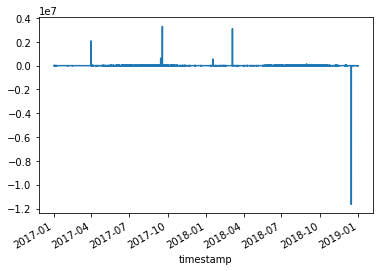

In [142]:
df['meter_reading'].plot()

In [103]:
df_full['meter_reading'].idxmin()

Timestamp('2018-12-15 12:00:00')

In [144]:
#Data cleaning - nulls and nans removed already

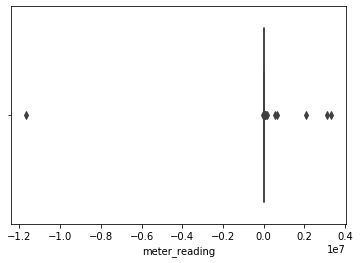

In [195]:
#Data is highly spiky and highly irregular. We will correct this
sns.boxplot(x=df_full['meter_reading'])

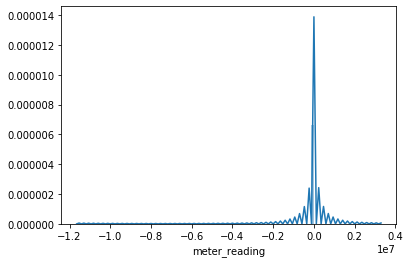

In [199]:
sns.distplot(df_full['meter_reading'], bins = 100)

In [160]:
df.head()

,meter_reading,building_id
timestamp,,
2017-01-01 00:00:00,173.370300,0
2017-01-01 01:00:00,178.148209,0
2017-01-01 02:00:00,177.465652,0
2017-01-01 03:00:00,176.783096,0
2017-01-01 04:00:00,177.465652,0


In [218]:
#Using Z-score, filtered from -3 to +3
z_scores = np.abs(stats.zscore(df))
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 0.05).all(axis=1)

In [219]:
filtered_entries

array([False, False, False, ..., False, False, False])

In [220]:
filt_df = df[filtered_entries]

In [221]:
filt_df

,meter_reading,building_id
timestamp,,
2017-01-01 00:00:00,266.198486,52
2017-01-01 01:00:00,267.563599,52
2017-01-01 02:00:00,258.007751,52
2017-01-01 03:00:00,260.055420,52
2017-01-01 04:00:00,279.849670,52
...,...,...
2018-12-31 19:00:00,503.456390,54
2018-12-31 20:00:00,504.548492,54
2018-12-31 21:00:00,518.745789,54


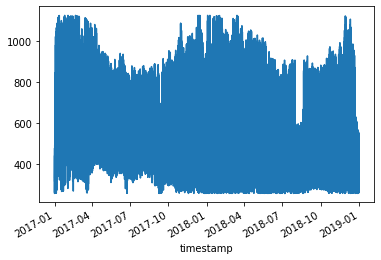

In [222]:
#Filtered data
filt_df['meter_reading'].plot()

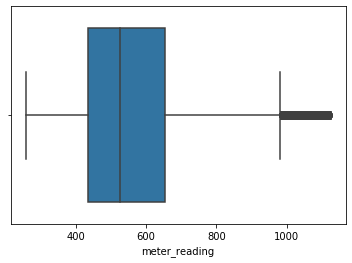

In [223]:
sns.boxplot(x=filt_df['meter_reading'])

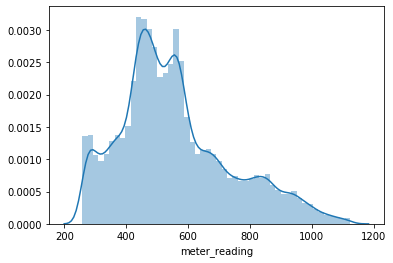

In [224]:
sns.distplot(filt_df['meter_reading'], bins = 50)

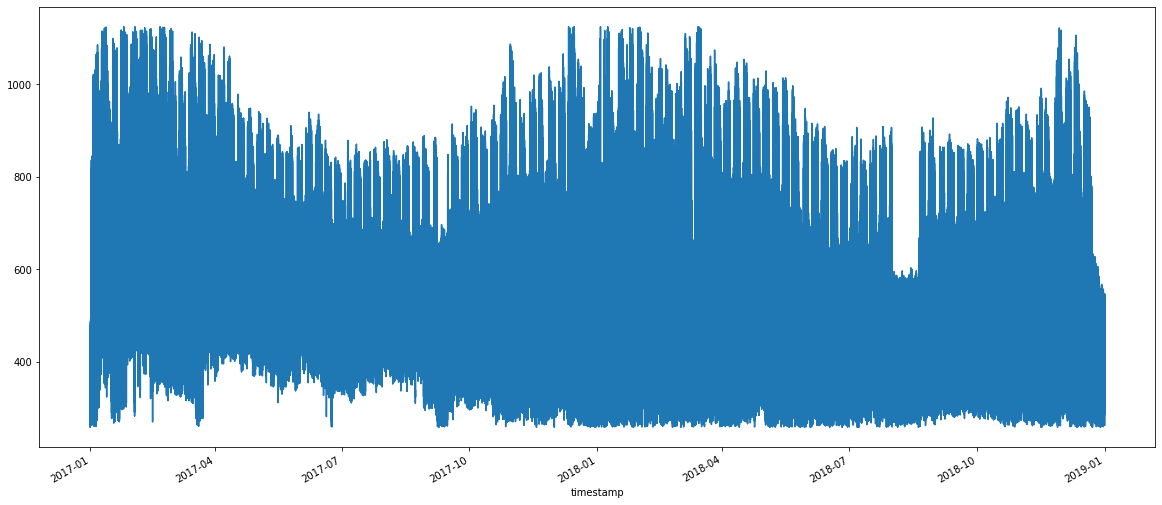

In [226]:
filt_df['meter_reading'].plot(figsize=(20,9))

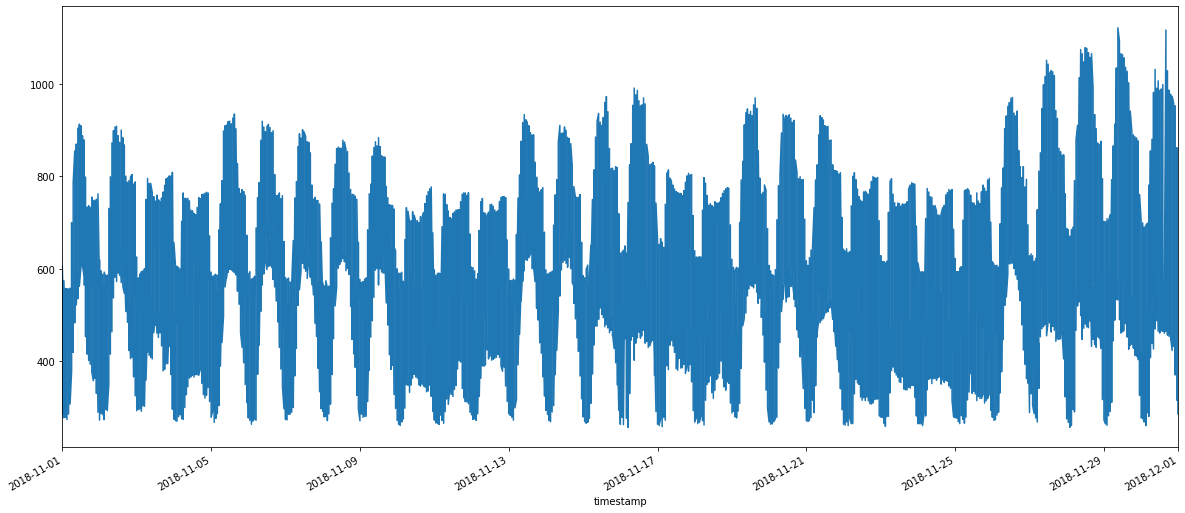

In [256]:
#Plot for a month
filt_df['meter_reading'].plot(figsize=(20,9),xlim =['2018-11-1','2018-12-1'])

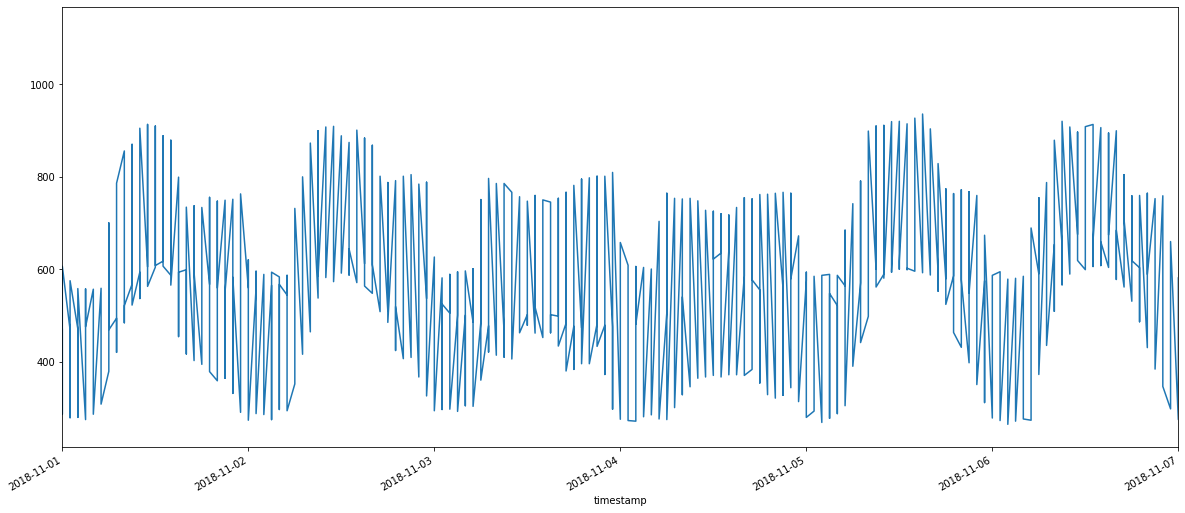

In [243]:
#Plot for a week
filt_df['meter_reading'].plot(figsize=(20,9),xlim =['2018-11-1','2018-11-7'])

In [304]:
#Now looking at weekly and monthly and yearly rolling averages
#Readings are hourly
#filt_df['Daily'] = filt_df['meter_reading'].rolling(window=24).mean()

In [305]:
#filt_df['7Day'] = filt_df['meter_reading'].rolling(window=168).mean()

In [330]:
filt_df.index

DatetimeIndex(['2017-01-01 00:00:00', '2017-01-01 01:00:00',
               '2017-01-01 02:00:00', '2017-01-01 03:00:00',
               '2017-01-01 04:00:00', '2017-01-01 05:00:00',
               '2017-01-01 06:00:00', '2017-01-01 07:00:00',
               '2017-01-01 08:00:00', '2017-01-01 09:00:00',
               ...
               '2018-12-31 14:00:00', '2018-12-31 15:00:00',
               '2018-12-31 16:00:00', '2018-12-31 17:00:00',
               '2018-12-31 18:00:00', '2018-12-31 19:00:00',
               '2018-12-31 20:00:00', '2018-12-31 21:00:00',
               '2018-12-31 22:00:00', '2018-12-31 23:00:00'],
              dtype='datetime64[ns]', name='timestamp', length=51238, freq=None)

In [ ]:
#Freq = none, we can use the DataFrame’s asfreq() method to assign a frequency

In [370]:
#Resampling (downsampling) - Overall, i.e. all buildings
filt_df_daily_mean = filt_df['meter_reading'].resample('D').mean()
filt_df_weekly_mean = filt_df['meter_reading'].resample('W').mean()
filt_df_monthly_mean = filt_df['meter_reading'].resample('M').mean()

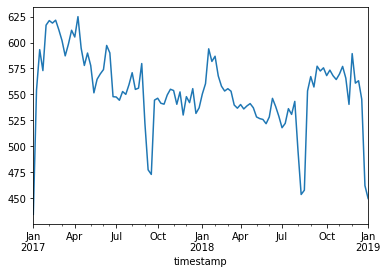

In [371]:
filt_df_weekly_mean.plot()

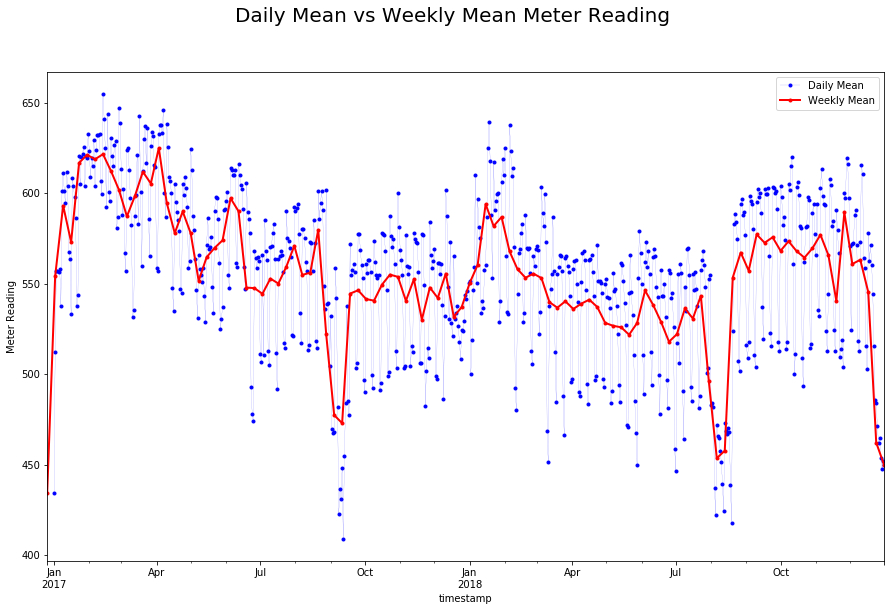

In [396]:
fig, ax = plt.subplots(figsize=(15, 9))
fig.suptitle('Daily Mean vs Weekly Mean Meter Reading', fontsize=20)
ax.plt = filt_df_daily_mean.plot(marker='.', linestyle='-', linewidth=0.1, label='Daily Mean',c='blue')
ax.plt = filt_df_weekly_mean.plot(marker='.', linestyle='-', linewidth=2, label='Weekly Mean',c='red')
ax.set_ylabel('Meter Reading')
ax.legend();

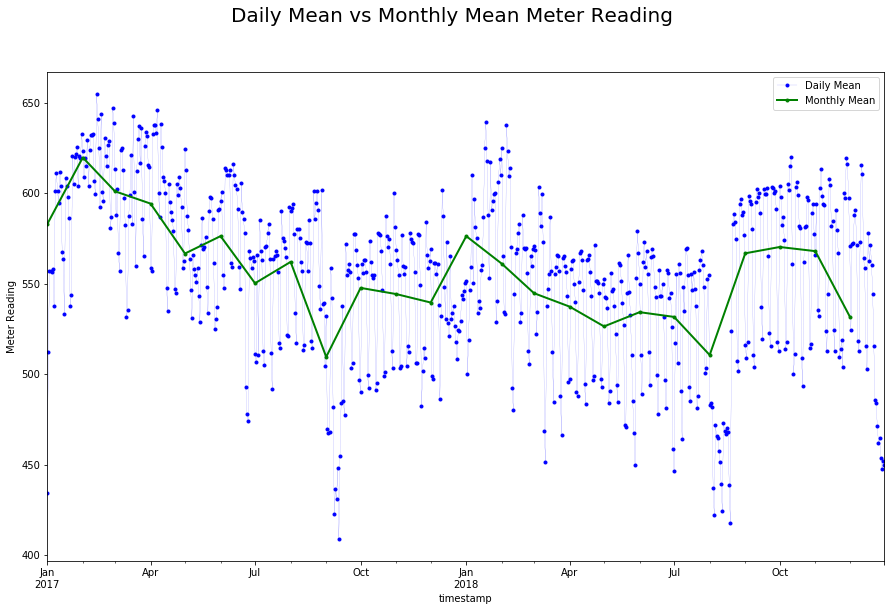

In [395]:
fig, ax = plt.subplots(figsize=(15, 9))
fig.suptitle('Daily Mean vs Monthly Mean Meter Reading', fontsize=20)
ax.plt = filt_df_daily_mean.plot(marker='.', linestyle='-', linewidth=0.1, label='Daily Mean',c='blue')
ax.plt = filt_df_monthly_mean.plot(marker='.', linestyle='-', linewidth=2, label='Monthly Mean',c='green')
ax.set_ylabel('Meter Reading')
ax.legend();

In [380]:
filt_df['building_id'].unique()

array([52, 53, 54], dtype=int16)

In [381]:
#Now resampling for each unique building, 52, 53 and 54

In [382]:
filt_df['building_id']==52

timestamp
2017-01-01 00:00:00     True
2017-01-01 01:00:00     True
2017-01-01 02:00:00     True
2017-01-01 03:00:00     True
2017-01-01 04:00:00     True
                       ...  
2018-12-31 19:00:00    False
2018-12-31 20:00:00    False
2018-12-31 21:00:00    False
2018-12-31 22:00:00    False
2018-12-31 23:00:00    False
Name: building_id, Length: 51238, dtype: bool

In [386]:
#Data for building 52
filt_df_52=filt_df[filt_df['building_id']==52]

In [387]:
filt_df_52

,meter_reading,building_id
timestamp,,
2017-01-01 00:00:00,266.198486,52
2017-01-01 01:00:00,267.563599,52
2017-01-01 02:00:00,258.007751,52
2017-01-01 03:00:00,260.055420,52
2017-01-01 04:00:00,279.849670,52
...,...,...
2018-12-31 19:00:00,283.945038,52
2018-12-31 20:00:00,287.357849,52
2018-12-31 21:00:00,305.104401,52


In [388]:
#Data for building 53
filt_df_53=filt_df[filt_df['building_id']==53]

In [389]:
#Data for building 54
filt_df_54=filt_df[filt_df['building_id']==54]

In [397]:
#Resampling 52 (downsampling)
filt_df_52_daily_mean = filt_df_52['meter_reading'].resample('D').mean()
filt_df_52_weekly_mean = filt_df_52['meter_reading'].resample('W').mean()
filt_df_52_monthly_mean = filt_df_52['meter_reading'].resample('M').mean()

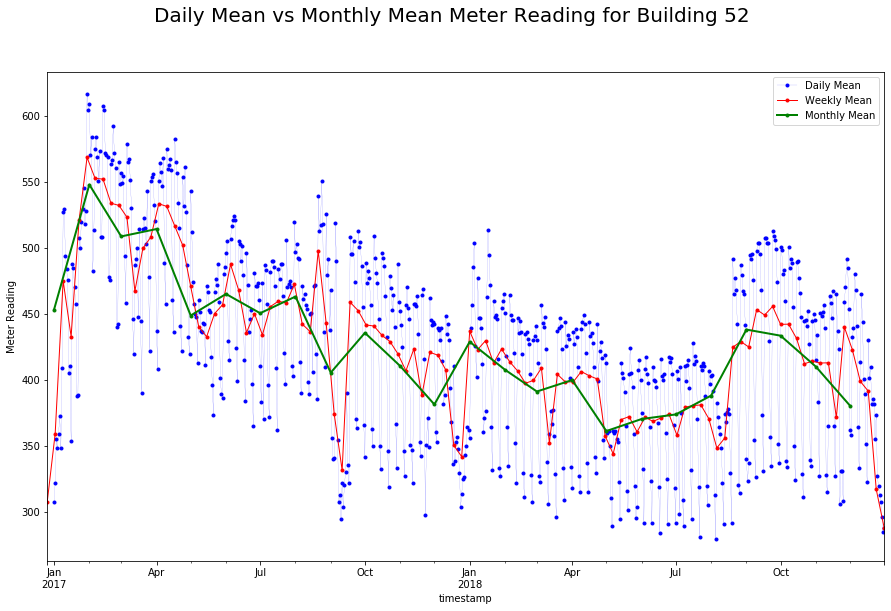

In [401]:
fig, ax = plt.subplots(figsize=(15, 9))
fig.suptitle('Daily Mean vs Monthly Mean Meter Reading for Building 52', fontsize=20)
ax.plt = filt_df_52_daily_mean.plot(marker='.', linestyle='-', linewidth=0.1, label='Daily Mean',c='blue')
ax.plt = filt_df_52_weekly_mean.plot(marker='.', linestyle='-', linewidth=1, label='Weekly Mean',c='red')
ax.plt = filt_df_52_monthly_mean.plot(marker='.', linestyle='-', linewidth=2, label='Monthly Mean',c='green')
ax.set_ylabel('Meter Reading')
ax.legend();

In [402]:
#Resampling 53 (downsampling)
filt_df_53_daily_mean = filt_df_53['meter_reading'].resample('D').mean()
filt_df_53_weekly_mean = filt_df_53['meter_reading'].resample('W').mean()
filt_df_53_monthly_mean = filt_df_53['meter_reading'].resample('M').mean()

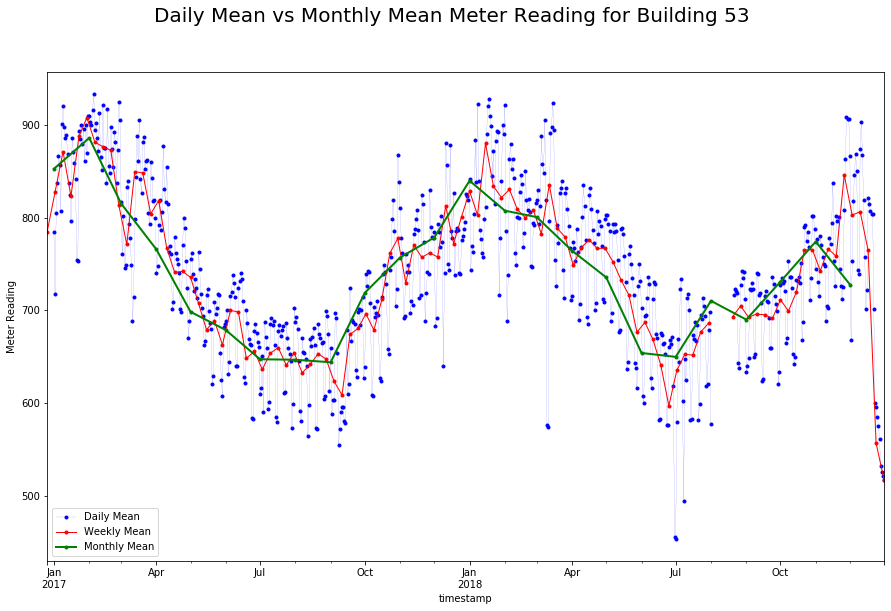

In [403]:
fig, ax = plt.subplots(figsize=(15, 9))
fig.suptitle('Daily Mean vs Monthly Mean Meter Reading for Building 53', fontsize=20)
ax.plt = filt_df_53_daily_mean.plot(marker='.', linestyle='-', linewidth=0.1, label='Daily Mean',c='blue')
ax.plt = filt_df_53_weekly_mean.plot(marker='.', linestyle='-', linewidth=1, label='Weekly Mean',c='red')
ax.plt = filt_df_53_monthly_mean.plot(marker='.', linestyle='-', linewidth=2, label='Monthly Mean',c='green')
ax.set_ylabel('Meter Reading')
ax.legend();

In [404]:
#Resampling 54 (downsampling)
filt_df_54_daily_mean = filt_df_54['meter_reading'].resample('D').mean()
filt_df_54_weekly_mean = filt_df_54['meter_reading'].resample('W').mean()
filt_df_54_monthly_mean = filt_df_54['meter_reading'].resample('M').mean()

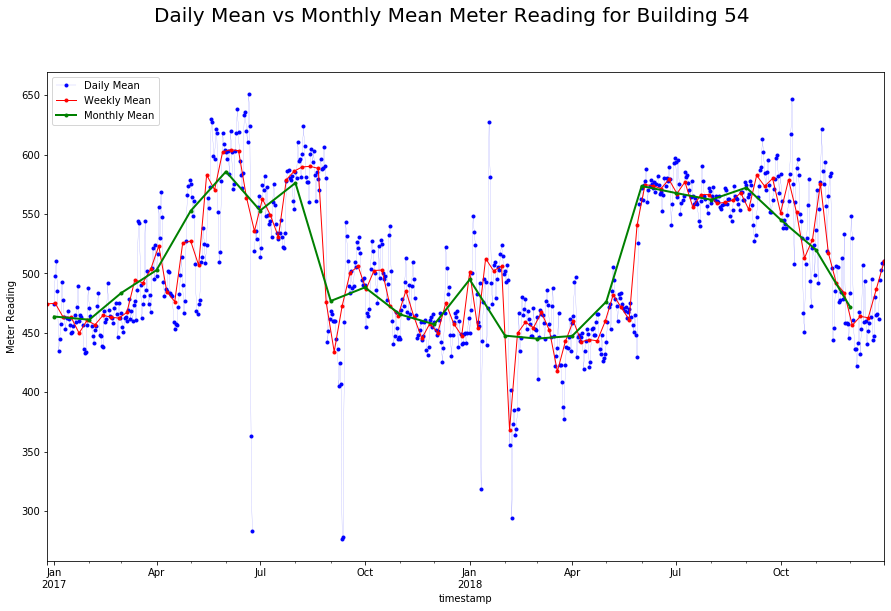

In [405]:
fig, ax = plt.subplots(figsize=(15, 9))
fig.suptitle('Daily Mean vs Monthly Mean Meter Reading for Building 54', fontsize=20)
ax.plt = filt_df_54_daily_mean.plot(marker='.', linestyle='-', linewidth=0.1, label='Daily Mean',c='blue')
ax.plt = filt_df_54_weekly_mean.plot(marker='.', linestyle='-', linewidth=1, label='Weekly Mean',c='red')
ax.plt = filt_df_54_monthly_mean.plot(marker='.', linestyle='-', linewidth=2, label='Monthly Mean',c='green')
ax.set_ylabel('Meter Reading')
ax.legend();

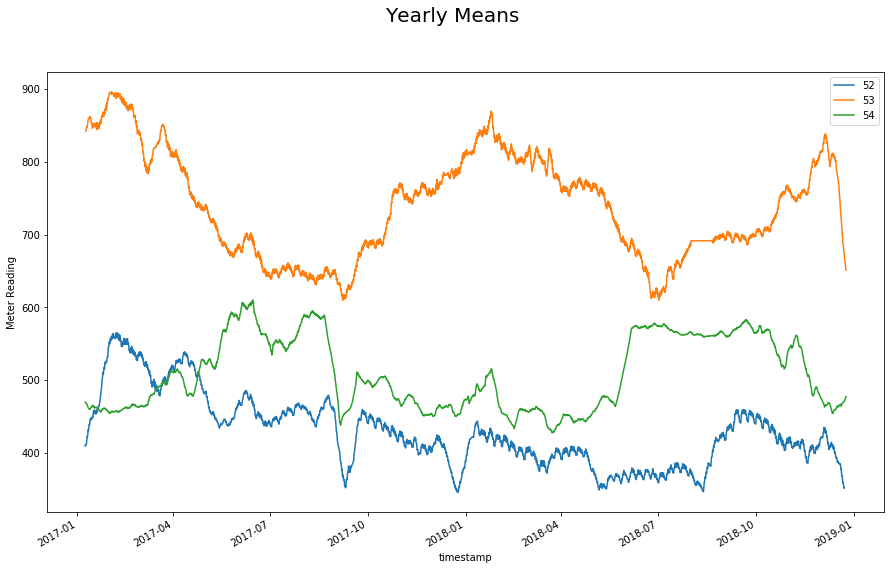

In [502]:
fig, ax = plt.subplots(figsize=(15, 9))
fig.suptitle('Yearly Means', fontsize=20)
ax.plt=filt_df_52['meter_reading'].rolling(window=365, center=True, min_periods=360).mean().plot(label='52')
ax.plt=filt_df_53['meter_reading'].rolling(window=365, center=True, min_periods=360).mean().plot(label='53')
ax.plt=filt_df_54['meter_reading'].rolling(window=365, center=True, min_periods=360).mean().plot(label='54')
ax.set_ylabel('Meter Reading')
ax.legend();

In [478]:
#Concatenate all features into DFs
df_monthly_means = pd.concat([filt_df_52_monthly_mean,filt_df_53_monthly_mean,filt_df_54_monthly_mean], axis = 1)
df_weekly_means = pd.concat([filt_df_52_weekly_mean,filt_df_53_weekly_mean,filt_df_54_weekly_mean], axis = 1)
df_daily_means = pd.concat([filt_df_52_daily_mean,filt_df_53_daily_mean,filt_df_54_daily_mean], axis = 1)

In [483]:
df_monthly_means.columns='52M','53M','54M'
df_weekly_means.columns='52W','53W','54W'
df_daily_means.columns='52D','53D','54D'

In [484]:
df_weekly_means

,52W,53W,54W
timestamp,,,
2017-01-01,307.265839,784.261658,474.424835
2017-01-08,359.063446,827.356445,474.957886
2017-01-15,474.972534,870.869446,463.302368
2017-01-22,432.710663,822.968506,463.191864
2017-01-29,521.012817,887.416199,449.813660
...,...,...,...
2018-12-09,422.852173,802.597351,456.372742
2018-12-16,398.773041,806.286438,463.932922
2018-12-23,391.299408,764.520264,462.775818


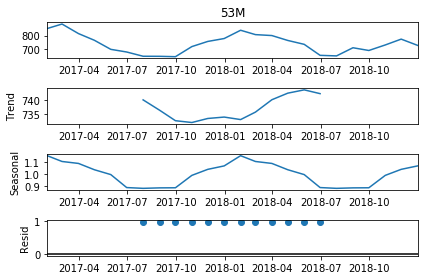

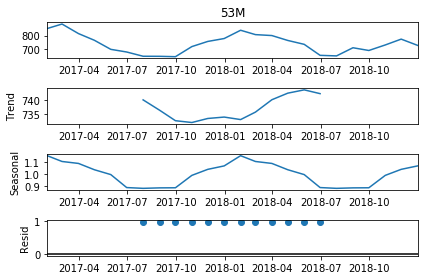

In [488]:
#Decomposition of 53 Monthly behaviour
from statsmodels.tsa.seasonal import seasonal_decompose
result53M = seasonal_decompose(df_monthly_means['53M'], model='multiplicative')
result53M.plot()